<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0    

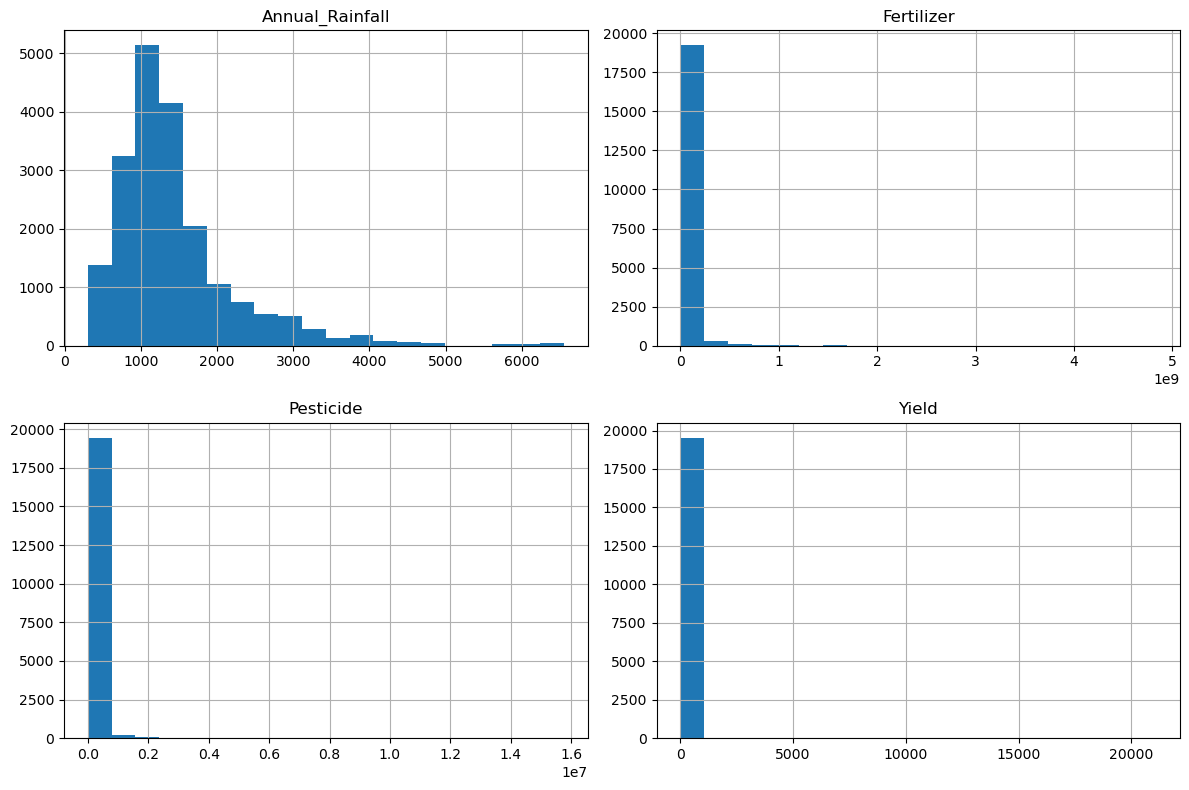

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('crop_yield.csv')

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Plot distributions of key numerical features
df[['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


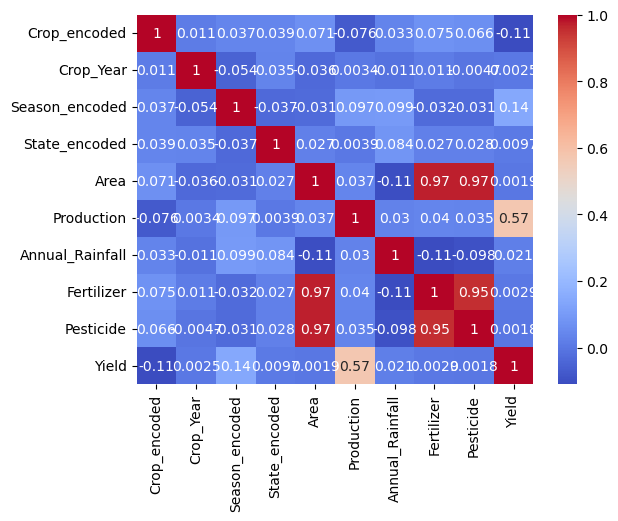

                 Crop_encoded  Crop_Year  Season_encoded  State_encoded  \
Crop_encoded         1.000000   0.010933        0.037492       0.038587   
Crop_Year            0.010933   1.000000       -0.053790       0.035491   
Season_encoded       0.037492  -0.053790        1.000000      -0.036625   
State_encoded        0.038587   0.035491       -0.036625       1.000000   
Area                 0.071105  -0.035686       -0.031369       0.026989   
Production          -0.075893   0.003366        0.096856       0.003917   
Annual_Rainfall      0.033462  -0.011187        0.099357       0.083953   
Fertilizer           0.074676   0.011169       -0.031800       0.026947   
Pesticide            0.066409  -0.004657       -0.030598       0.027629   
Yield               -0.110894   0.002539        0.141791       0.009668   

                     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
Crop_encoded     0.071105   -0.075893         0.033462    0.074676   0.066409   
Crop_Year   

In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables: Crop, Season, State
le_crop = LabelEncoder()
le_season = LabelEncoder()
le_state = LabelEncoder()

df['Crop_encoded'] = le_crop.fit_transform(df['Crop'])
df['Season_encoded'] = le_season.fit_transform(df['Season'])
df['State_encoded'] = le_state.fit_transform(df['State'])

# Select features and target variable
features = ['Crop_encoded', 'Crop_Year', 'Season_encoded', 'State_encoded', 'Area', 'Production', 
            'Annual_Rainfall', 'Fertilizer', 'Pesticide']
target = 'Yield'

X = df[features]
y = df[target]

# Optional: Check correlation between features and target
corr = df[features + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Print the correlation matrix coordinates
corr_matrix = df[['Crop_encoded', 'Crop_Year', 'Season_encoded', 'State_encoded', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].corr()
print(corr_matrix)

In [3]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_encoded,Season_encoded,State_encoded
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,0,4,2
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,1,1,2
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,8,1,2
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,9,4,2
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,11,1,2


In [4]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
Crop_encoded         int64
Season_encoded       int64
State_encoded        int64
dtype: object

In [5]:
# Display the first few rows of the encoded columns along with their data types
print(df[['Crop_encoded', 'Season_encoded', 'State_encoded']].head())
print(df[['Crop_encoded', 'Season_encoded', 'State_encoded']].dtypes)

   Crop_encoded  Season_encoded  State_encoded
0             0               4              2
1             1               1              2
2             8               1              2
3             9               4              2
4            11               1              2
Crop_encoded      int64
Season_encoded    int64
State_encoded     int64
dtype: object


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Define features and target variable
features = ['Crop_encoded', 'Crop_Year', 'Season_encoded', 'State_encoded', 
            'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
target = 'Yield'

X = df[features]
y = df[target]

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance using Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 104124.47888993817
Mean Absolute Error: 15.115179258643703


Feature Importances:
           Feature  Importance
5       Production    0.486751
0     Crop_encoded    0.304388
3    State_encoded    0.110039
4             Area    0.078701
6  Annual_Rainfall    0.007315
8        Pesticide    0.005674
1        Crop_Year    0.004434
7       Fertilizer    0.002643
2   Season_encoded    0.000055


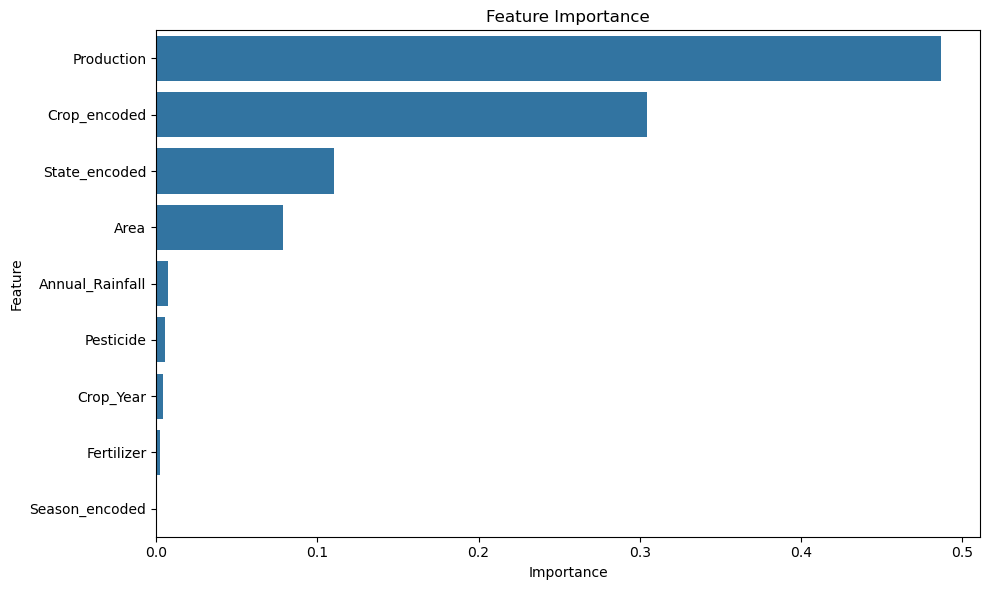

Feature: Production, Importance: 0.48675069212913513
Feature: Crop_encoded, Importance: 0.3043883740901947
Feature: State_encoded, Importance: 0.11003934592008591
Feature: Area, Importance: 0.07870115339756012
Feature: Annual_Rainfall, Importance: 0.007314968388527632
Feature: Pesticide, Importance: 0.005673614330589771
Feature: Crop_Year, Importance: 0.004434312228113413
Feature: Fertilizer, Importance: 0.0026430096477270126
Feature: Season_encoded, Importance: 5.4567390179727226e-05
Original predicted yield: 5.719146728515625
Predicted yield with 10% increased fertilizer: 5.673725128173828


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Feature Importance ---
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importances:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print coordinates for each bar in the plot for evaluation
for idx, row in importance_df.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']}")

# --- Simulation: Impact of Increasing Fertilizer by 10% on Yield Prediction ---
# Select a test sample from the test set
sample = X_test.iloc[0].copy()
original_prediction = model.predict(sample.values.reshape(1, -1))[0]

# Create a modified sample by increasing fertilizer input by 10%
sample_modified = sample.copy()
sample_modified['Fertilizer'] = sample['Fertilizer'] * 1.10  # Increase by 10%
modified_prediction = model.predict(sample_modified.values.reshape(1, -1))[0]

print(f"Original predicted yield: {original_prediction}")
print(f"Predicted yield with 10% increased fertilizer: {modified_prediction}")


In [8]:
import numpy as np
import pandas as pd

def recommend_adjustments(model, input_data, fertilizer_step=10, pesticide_step=5, max_iterations=5):
    """
    Suggests adjustments to fertilizer and pesticide usage to optimize crop yield.

    Parameters:
    - model: Trained machine learning model for yield prediction.
    - input_data: DataFrame containing input features for prediction.
    - fertilizer_step: Increment step for fertilizer adjustment.
    - pesticide_step: Increment step for pesticide adjustment.
    - max_iterations: Maximum number of adjustment iterations.

    Returns:
    - recommendations: Dictionary with suggested fertilizer and pesticide adjustments.
    """
    current_input = input_data.copy()
    current_yield = model.predict(current_input)[0]

    for _ in range(max_iterations):
        # Test increased fertilizer usage
        increased_fertilizer_input = current_input.copy()
        increased_fertilizer_input['Fertilizer'] += fertilizer_step
        increased_yield_fertilizer = model.predict(increased_fertilizer_input)[0]

        # Test increased pesticide usage
        increased_pesticide_input = current_input.copy()
        increased_pesticide_input['Pesticide'] += pesticide_step
        increased_yield_pesticide = model.predict(increased_pesticide_input)[0]

        # Determine which adjustment yields better results
        if increased_yield_fertilizer > current_yield and increased_yield_fertilizer >= increased_yield_pesticide:
            current_input = increased_fertilizer_input
            current_yield = increased_yield_fertilizer
        elif increased_yield_pesticide > current_yield:
            current_input = increased_pesticide_input
            current_yield = increased_yield_pesticide
        else:
            break  # No further improvement

    recommendations = {
        'Recommended Fertilizer': current_input['Fertilizer'].values[0],
        'Recommended Pesticide': current_input['Pesticide'].values[0],
        'Predicted Yield': current_yield
    }

    return recommendations

# ------------------------------
# Sample farmer input and testing the recommendation function:

# Sample data: Replace these values with actual inputs from the farmer
data = {
    'Crop_encoded': [1],         # Encoded value for the crop type
    'Crop_Year': [2020],         # Year of cultivation
    'Season_encoded': [0],       # Encoded value for the season (e.g., Kharif or Rabi)
    'State_encoded': [3],        # Encoded value for the state
    'Area': [1000.0],            # Area under cultivation (e.g., in hectares)
    'Production': [5000],        # Historical or current production (can be in tons)
    'Annual_Rainfall': [1200.0], # Annual rainfall in mm
    'Fertilizer': [1000000.0],   # Current fertilizer usage (e.g., in kg or a relevant unit)
    'Pesticide': [2000.0]        # Current pesticide usage (e.g., in kg or a relevant unit)
}

# Create a DataFrame from the sample data
farmer_input = pd.DataFrame(data)

# Example usage:
# Assuming 'model' is your trained model
recommendations = recommend_adjustments(model, farmer_input)
print("Recommendations for the farmer:")
print(recommendations)



Recommendations for the farmer:
{'Recommended Fertilizer': 1000000.0, 'Recommended Pesticide': 2000.0, 'Predicted Yield': 3.2241485}


In [9]:
import numpy as np

def recommend_adjustments(model, input_data, fertilizer_step=10, pesticide_step=5, max_iterations=5,
                          max_fertilizer=500, max_pesticide=50):
    """
    Suggests adjustments to fertilizer and pesticide usage to optimize crop yield,
    while ensuring realistic recommendations.
    """
    current_input = input_data.copy()
    current_yield = model.predict(current_input)[0]

    for _ in range(max_iterations):
        # Test increased fertilizer usage
        increased_fertilizer_input = current_input.copy()
        increased_fertilizer_input['Fertilizer'] = min(current_input['Fertilizer'].iloc[0] + fertilizer_step, max_fertilizer)
        increased_yield_fertilizer = model.predict(increased_fertilizer_input)[0]

        # Test increased pesticide usage
        increased_pesticide_input = current_input.copy()
        increased_pesticide_input['Pesticide'] = min(current_input['Pesticide'].iloc[0] + pesticide_step, max_pesticide)
        increased_yield_pesticide = model.predict(increased_pesticide_input)[0]

        # Determine which adjustment yields better results
        if increased_yield_fertilizer > current_yield and increased_yield_fertilizer >= increased_yield_pesticide:
            current_input = increased_fertilizer_input
            current_yield = increased_yield_fertilizer
        elif increased_yield_pesticide > current_yield:
            current_input = increased_pesticide_input
            current_yield = increased_yield_pesticide
        else:
            break  # No further improvement

    recommendations = {
        'Recommended Fertilizer': float(current_input['Fertilizer'].iloc[0]),
        'Recommended Pesticide': float(current_input['Pesticide'].iloc[0]),
        'Predicted Yield': float(current_yield)
    }

    return recommendations

# Example usage:
# Assuming 'model' is your trained model and 'farmer_input' is a DataFrame with the farmer's input data
recommendations = recommend_adjustments(model, farmer_input)
print(recommendations)


{'Recommended Fertilizer': 500.0, 'Recommended Pesticide': 50.0, 'Predicted Yield': 75.19828033447266}


In [10]:
import numpy as np

def recommend_adjustments(model, input_data, fertilizer_step=10, pesticide_step=5, max_iterations=5, 
                          min_fertilizer=50, max_fertilizer=500, min_pesticide=1, max_pesticide=50):
    """
    Suggests adjustments to fertilizer and pesticide usage to optimize crop yield.

    Parameters:
    - model: Trained machine learning model for yield prediction.
    - input_data: DataFrame containing input features for prediction.
    - fertilizer_step: Increment step for fertilizer adjustment (kg).
    - pesticide_step: Increment step for pesticide adjustment (kg).
    - max_iterations: Maximum number of adjustment iterations.
    - min_fertilizer, max_fertilizer: Constraints for fertilizer recommendations (kg).
    - min_pesticide, max_pesticide: Constraints for pesticide recommendations (kg).

    Returns:
    - recommendations: Dictionary with suggested fertilizer and pesticide adjustments.
    """
    current_input = input_data.copy()
    current_yield = model.predict(current_input)[0]

    for _ in range(max_iterations):
        # Test increased fertilizer usage within allowed range
        increased_fertilizer_input = current_input.copy()
        increased_fertilizer_input['Fertilizer'] = np.clip(current_input['Fertilizer'] + fertilizer_step, 
                                                            min_fertilizer, max_fertilizer)
        increased_yield_fertilizer = model.predict(increased_fertilizer_input)[0]

        # Test increased pesticide usage within allowed range
        increased_pesticide_input = current_input.copy()
        increased_pesticide_input['Pesticide'] = np.clip(current_input['Pesticide'] + pesticide_step, 
                                                         min_pesticide, max_pesticide)
        increased_yield_pesticide = model.predict(increased_pesticide_input)[0]

        # Determine which adjustment yields better results
        if increased_yield_fertilizer > current_yield and increased_yield_fertilizer >= increased_yield_pesticide:
            current_input = increased_fertilizer_input
            current_yield = increased_yield_fertilizer
        elif increased_yield_pesticide > current_yield:
            current_input = increased_pesticide_input
            current_yield = increased_yield_pesticide
        else:
            break  # No further improvement

    recommendations = {
        'Recommended Fertilizer': f"{current_input['Fertilizer'].values[0]} kg/ha",
        'Recommended Pesticide': f"{current_input['Pesticide'].values[0]} kg/ha",
        'Predicted Yield': f"{current_yield:.2f} tons/ha"
    }

    return recommendations

# Example usage:
# Assuming 'model' is your trained model and 'farmer_input' is a DataFrame with the farmer's input data
recommendations = recommend_adjustments(model, farmer_input)
print("Recommendations for the farmer:")
print(recommendations)


Recommendations for the farmer:
{'Recommended Fertilizer': '500.0 kg/ha', 'Recommended Pesticide': '50.0 kg/ha', 'Predicted Yield': '75.20 tons/ha'}
